In [1]:
import autograd.numpy as np
import autograd
from autograd import grad,elementwise_grad
import autograd.numpy.random as npr
import myOptimizers as optims
#import torch.optim as optims
import importlib
import os
import numpy 
import torch

from google.colab import drive
drive.mount('/content/drive')

In [2]:
def init_weights(scale, network_size, rs = npr.RandomState(42)):
  return [(rs.randn(inSize, outSize) * scale,
          rs.rand(outSize) * scale)
          for inSize, outSize in zip(network_size[:-1], network_size[1:])]


Model Definition

In [39]:
from autograd.numpy import array
#diffeq = Autograd ArrayBox with value 4664.302224688571
#loss = Autograd ArrayBox with value 68817.72138166349
params={'nn': [(array([[ 0.36483956, -1.07367409,  0.80609319, -1.0376456 , -0.37752501,
         0.89416497,  2.81681466, -0.92440683,  0.78669179,  2.71666616,
        -0.67627034,  2.58054662,  1.17574372, -2.9175075 ,  0.20503985,
         0.57710662]]), array([ 0.44360523,  2.21458955,  0.22289091,  2.12654341,  0.50430886,
       -0.11564148,  0.41460443,  1.90536342, -0.14642324, -0.16228935,
        1.29235239, -1.32895634,  0.90731752,  1.65455383, -0.02132479,
       -1.1892725 ])), (array([[ 0.95402533, -0.42626903, -0.52054478, -0.65522648, -1.14346622,
         0.47111041,  0.26399011, -1.23522545, -1.05305569, -0.66431988,
         0.80022866, -0.92354014,  2.22760729, -0.50752069, -0.35249135,
         0.97636698],
       [-2.70412316, -1.72886051, -0.60512229,  3.58602267, -2.17088932,
         4.68595373, -0.39114139, -1.18559157,  3.47056278,  2.24569452,
         4.17375189,  1.6753654 ,  0.31956   ,  0.06552538,  1.59229441,
         0.42295049],
       [-1.16952011, -0.00520493, -0.25499751, -0.69664929,  1.29636381,
         0.50671797,  0.95530306, -0.68714477, -1.32688264, -1.05765543,
        -0.98627006, -2.69604476,  0.08741892,  0.14662941,  0.7476961 ,
         0.16072   ],
       [-2.76992022,  1.86542742,  2.32557398,  3.17993135, -2.11344943,
         1.53993432, -0.21711455, -0.15890236,  4.15432398,  1.81831274,
         1.96452414, -0.42667557, -0.60989952, -2.19904271,  1.1858772 ,
         0.78211735],
       [-0.59295655, -1.49992459,  1.07428119,  0.65047706, -1.57540219,
        -2.19560444, -0.38447709,  2.94581295,  2.07328191,  0.29197214,
        -0.13990331,  1.59373051, -1.45355333, -0.12007186,  1.83288551,
         1.88729821],
       [-0.30189568,  0.43038873, -1.12292072, -1.3436563 ,  0.12563079,
        -0.06288533,  1.85638705, -2.50495566,  1.45505568, -0.92836264,
        -0.2676878 , -1.54231916, -2.38153238,  1.06699342,  0.0377787 ,
        -0.42709175],
       [-0.99517229,  0.6544272 , -1.52102925, -0.53361521,  0.17339039,
        -1.10377819,  0.85343259, -3.10154592,  0.50729927, -0.33398149,
        -1.37785428,  0.76279319, -0.44680587, -0.87306442, -0.19462572,
         1.41201587],
       [-2.67247258,  0.1204224 ,  1.36176193,  3.04590446, -1.50015187,
         1.24624698, -0.57663739, -1.16571751,  0.38971381, -2.68715083,
         2.07074677,  1.01823582, -2.65812518, -1.21536377,  1.69122981,
         3.14947106],
       [-0.17602909, -0.12706362, -0.46605654,  0.78148557, -0.05918124,
        -1.34425394,  0.73062735, -2.88990202, -0.04896092,  0.86990298,
        -0.02959397, -1.179103  ,  0.08003968, -1.34099744,  0.02514214,
        -0.45254722],
       [-1.29582102,  3.31099909,  0.87888729, -0.68597507, -0.94156399,
         1.34005446,  1.24636632, -3.15762478,  0.97829389, -1.35907865,
         2.11009608,  0.64074991, -0.53584332,  1.34370021, -0.52285196,
         0.62855681],
       [-0.21818205, -0.70437939,  0.01241572,  3.38213213, -1.32925672,
         0.81674174, -0.60362207, -0.68916421,  3.23244072, -0.94574051,
         1.07693141,  1.39968484,  0.26644489,  0.40213024, -0.34644811,
         0.66311197],
       [-1.15320103,  1.00390258,  1.77318879,  2.77229653,  0.24591342,
         0.24224711,  0.38665325, -1.62287713,  0.36370662, -0.83955998,
         0.15962701,  0.79006104, -1.3589218 ,  1.51463893,  0.74906198,
        -0.18662381],
       [-2.77972887, -0.41490252,  1.10907792,  0.07203568, -1.32623012,
        -0.49520678,  1.26092509, -1.14399021, -0.34595497, -0.54281797,
        -0.22127579, -1.41140884,  2.11234273, -0.2987781 ,  0.8013399 ,
         1.79311512],
       [ 1.89190152, -0.70019965, -0.47872136, -0.19686068, -1.06951689,
         0.56801199, -1.12731511,  1.57814118, -0.44385178,  0.52662476,
         0.530119  ,  0.38773898,  1.02314705, -1.75617791,  1.44755302,
        -1.17855971],
       [-0.0219624 ,  2.26423748, -1.36474203, -1.50796119,  0.38399623,
        -0.11877554,  0.97253698, -1.72625756,  0.38108218,  0.6561931 ,
         0.36131709, -0.96198179,  1.14926929,  1.90378354, -0.84979212,
        -1.1498994 ],
       [ 1.66060088, -0.27716167, -3.50074094, -1.52737048,  0.78370344,
        -1.91271985,  0.37740077, -0.06359933, -1.0350749 , -1.07883218,
        -1.29759941, -0.68312201,  1.25069302,  0.81317385, -1.82553003,
         0.32826281]]), array([-0.35558652,  0.45738314,  0.56456202,  0.47653095, -0.17785071,
        0.81960387,  0.41424815, -1.16330497, -0.04138208,  0.53671944,
        0.66834727,  0.28291355,  0.80845037,  0.16902722,  0.40196629,
        0.43346859])), (array([[ 2.32839552],
       [ 1.12743529],
       [ 1.00737329],
       [-1.72069515],
       [-0.68369219],
       [ 2.14965646],
       [-1.59923401],
       [ 0.18110286],
       [ 2.34295297],
       [ 1.78675901],
       [ 1.36240125],
       [ 1.94892963],
       [-2.54363294],
       [ 2.26370316],
       [-1.73556077],
       [-3.04557768]]), array([0.57502119]))], 'E': array(30.)}
paramsy={'nn': [(array([[ 0.29281787, -1.16782171,  0.74521583, -1.05349703, -0.77507278,
         1.0298317 ,  2.81054505, -0.93788663,  0.85076557,  2.72767449,
        -0.62748756,  3.03166072,  1.03374272, -2.48478376,  0.4864656 ,
         0.64174899]]), array([ 0.32422674,  2.15683477,  0.03394746,  2.14423539,  0.66883021,
       -0.0540224 ,  0.65077034,  1.92630629, -0.26575018,  0.06944789,
        1.30411922, -0.92759825,  0.73039451,  2.16136469, -0.06485356,
       -1.25823472])), (array([[ 1.0119463 , -0.14259102, -0.48245125, -0.56062891, -1.20448619,
         0.45114393, -0.10593056, -1.00736066, -1.07909889, -0.5975476 ,
         0.77670153, -0.98435768,  2.12132058, -0.32182223, -0.76388657,
         0.59370059],
       [-2.41439887, -1.43473508, -0.38120003,  3.39010186, -2.40536466,
         4.98999141, -1.03395103, -0.95258661,  3.76656567,  2.40238026,
         4.49155259,  1.78368137,  0.20507024,  0.32862024,  1.52258846,
        -0.0810052 ],
       [-1.12836529,  0.22913565, -0.21442462, -0.60102519,  1.23262765,
         0.48896079,  0.70279548, -0.49026568, -1.35310282, -1.01891933,
        -1.00852348, -2.81315912, -0.02837973,  0.30648977,  0.2815553 ,
        -0.22040617],
       [-2.51840374,  2.15969131,  2.60658964,  2.76645127, -2.48736482,
         1.8899049 , -0.8358943 ,  0.07418033,  4.710277  ,  1.96676196,
         2.41523656, -0.33166232, -0.76344772, -1.93561605,  0.99266779,
         0.08299212],
       [-0.40393892, -1.1927414 ,  1.06808965,  0.5197394 , -1.53001917,
        -2.1213723 , -1.3263641 ,  3.18642346,  2.10219331,  0.82777539,
        -0.08111875,  2.25364874, -1.53150714,  0.3040676 ,  3.05640961,
         2.18713576],
       [-0.44319015,  0.15755036, -1.08130629, -1.24715163,  0.06040043,
        -0.08004173,  1.57583956, -2.75824192,  1.42897741, -0.88514321,
        -0.28952326, -1.688249  , -2.44911383,  1.22303538, -0.43372957,
        -0.80463567],
       [-0.92685264,  0.94798743, -1.47719406, -0.43920425,  0.10670497,
        -1.11862887,  0.32908086, -2.85464492,  0.48298705, -0.2174307 ,
        -1.39744249,  0.7664464 , -0.55926022, -0.64866905, -0.53209223,
         1.01669266],
       [-2.49244638,  0.41475998,  1.55211426,  3.04189227, -1.71972789,
         1.39545821, -1.19813722, -0.93269446,  0.50540324, -2.53784025,
         2.22457288,  1.10794965, -2.77664913, -0.95261295,  1.45666454,
         2.56595661],
       [-0.34772153, -0.43409087, -0.42851959,  0.87901351, -0.12069824,
        -1.36538749,  0.68826245, -3.13289933, -0.07673604,  0.77497623,
        -0.0545174 , -1.43289364,  0.09862667, -1.25932567, -0.553513  ,
        -0.81642027],
       [-1.43914558,  3.53972246,  0.92242683, -0.59156124, -1.00824471,
         1.32519857,  0.71644855, -3.17660885,  0.95397784, -1.23597122,
         2.09050314,  0.63226115, -0.58711795,  1.56049829, -0.86546969,
         0.2502125 ],
       [ 0.03670276, -0.40937379,  0.25259881,  3.1265973 , -1.63595565,
         1.10657464, -1.25218607, -0.45618651,  3.57424384, -0.77482149,
         1.43130484,  1.54486226,  0.11393555,  0.68819377, -0.33051259,
        -0.15660096],
       [-1.31841241,  0.7099332 ,  1.81617624,  2.86676703,  0.17931702,
         0.22729376,  0.07344309, -1.84979143,  0.33931893, -1.06936574,
         0.13994628,  0.62070639, -1.28779653,  1.62899048,  0.34367059,
        -0.54119502],
       [-2.71406322, -0.12940929,  1.1527293 ,  0.1665706 , -1.39260026,
        -0.51033074,  0.78429613, -0.91507657, -0.37050223, -0.44403785,
        -0.2411357 , -1.4266951 ,  2.00621613, -0.08456027,  0.44098285,
         1.39065216],
       [ 2.06003373, -0.39813849, -0.52166069, -0.29132479, -1.00295462,
         0.58290647, -1.85401368,  1.813976  , -0.41942748,  0.88033096,
         0.54979775,  0.72067774,  0.95114802, -1.74538187,  2.03703711,
        -0.82541435],
       [-0.21560261,  1.96315709, -1.32553108, -1.39330776,  0.31776842,
        -0.14558798,  0.87342395, -1.97093441,  0.3478442 ,  0.52470438,
         0.32985008, -1.26023716,  1.14285191,  2.00021181, -1.48966118,
        -1.54211522],
       [ 1.33544824, -0.57280059, -3.9680786 , -1.23979386,  1.20341027,
        -2.29471746,  1.03745622, -0.29701368, -1.3543237 , -1.25758098,
        -1.68154211, -0.83146132,  1.62529405,  0.52696296, -1.81453932,
         1.33864655]]), array([-0.28159448,  0.75121391,  0.6086958 ,  0.57094063, -0.24453831,
        0.80475548, -0.09924336, -0.93024985, -0.06569247,  0.64827167,
        0.64876113,  0.29293028,  0.70301174,  0.3971928 ,  0.06736171,
        0.02269165])), (array([[ 2.31995736],
       [ 0.96873915],
       [ 1.016178  ],
       [-1.69415226],
       [-0.69184732],
       [ 2.15965628],
       [-1.76468594],
       [ 0.18267232],
       [ 2.3706634 ],
       [ 1.98267103],
       [ 1.3813059 ],
       [ 2.1922155 ],
       [-2.35896719],
       [ 2.05131728],
       [-1.85807297],
       [-3.09582045]]), array([0.58345935]))], 'E': array(30.)}

In [47]:
def activation(xtilda):
  return (1.0- np.exp(-2*xtilda))/ (1.0 + np.exp(-2*xtilda))
def sigmoid(xtilda):
  return 1/(1+np.exp(-2*xtilda))

def psix(nnparams, input):
  initInput = input
  xtilda = (initInput - x0)/(x1 - x0)
 
  for w,b in nnparams:
    output = np.dot(input, w)+b 
    input = activation(output)
  #input=sigmoid(input)
  #return (1-np.exp((1-xtilda)*xtilda))*input
  return  xtilda + (1-np.exp(xtilda * (1-xtilda)))*input
  #return  psix0 +xtilda*(psix1-psix0)*input
dpsix = elementwise_grad(psix, 1)
ddpsix = elementwise_grad(dpsix, 1)
print(psix(params['nn'],x))

[[0.        ]
 [0.03033957]
 [0.05608964]
 [0.0767323 ]
 [0.09389406]
 [0.11111752]
 [0.13081685]
 [0.15166797]
 [0.17076333]
 [0.18769441]
 [0.20461385]
 [0.22334073]
 [0.24385754]
 [0.26511213]
 [0.28644104]
 [0.30795502]
 [0.32962892]
 [0.35061445]
 [0.37016686]
 [0.38891093]
 [0.40822824]
 [0.42863305]
 [0.44949527]
 [0.46997879]
 [0.48971635]
 [0.50880632]
 [0.52754139]
 [0.54619874]
 [0.5649579 ]
 [0.58390005]
 [0.60303808]
 [0.62234923]
 [0.6417998 ]
 [0.66136041]
 [0.68101326]
 [0.70075379]
 [0.72058855]
 [0.74053066]
 [0.7605935 ]
 [0.78078335]
 [0.801091  ]
 [0.82148332]
 [0.84189611]
 [0.86223198]
 [0.88236934]
 [0.90219101]
 [0.92163726]
 [0.94076909]
 [0.9597996 ]
 [0.97914247]
 [1.        ]]


In [56]:
def psiy(nnparams, input):
  initInput = input
  ytilda = (initInput - y0)/(y1 - y0)
 
  for w,b in nnparams:
    output = np.dot(input, w) + b
    input = activation(output)
  #input=sigmoid(input)
  return  (ytilda + input*(1-np.exp(ytilda * (1-ytilda))))*5.0/8
  #return  (1-np.exp(ytilda * (1-ytilda)))*output
  #return  psiy0+ ytilda*(psiy1-psiy0)*input
  #return output*(1-np.exp((1-ytilda)))
def psiyy(nnparams, input):
    return y*psiy(nnparams, input)
dpsiy = elementwise_grad(psiyy, 1)
ddpsiy =elementwise_grad(dpsiy, 1)
print(psiy(paramsy['nn'],y))

[[0.00000000e+00]
 [1.29317849e-04]
 [5.33548194e-04]
 [1.23743146e-03]
 [2.26543829e-03]
 [3.64170409e-03]
 [5.38993323e-03]
 [7.53331030e-03]
 [1.00944177e-02]
 [1.30951547e-02]
 [1.65566583e-02]
 [2.04992250e-02]
 [2.49422355e-02]
 [2.99040814e-02]
 [3.54020957e-02]
 [4.14524866e-02]
 [4.80702747e-02]
 [5.52692347e-02]
 [6.30618417e-02]
 [7.14592211e-02]
 [8.04711044e-02]
 [9.01057891e-02]
 [1.00370104e-01]
 [1.11269379e-01]
 [1.22807429e-01]
 [1.34986534e-01]
 [1.47807446e-01]
 [1.61269388e-01]
 [1.75370066e-01]
 [1.90105674e-01]
 [2.05470901e-01]
 [2.21458939e-01]
 [2.38061508e-01]
 [2.55268886e-01]
 [2.73069955e-01]
 [2.91452251e-01]
 [3.10402023e-01]
 [3.29904306e-01]
 [3.49943025e-01]
 [3.70501205e-01]
 [3.91561516e-01]
 [4.13108169e-01]
 [4.35134444e-01]
 [4.57673832e-01]
 [4.80916526e-01]
 [5.05514768e-01]
 [5.32726712e-01]
 [5.62460436e-01]
 [5.90016151e-01]
 [6.10484561e-01]
 [6.25000000e-01]]



**Intializations**

In [5]:
psix0 = 100 # Boundry condition
psix1 = 20 # Boundry condition
psiy0 = 100
psiy1 = 50
l = 2 # Length of rod
b = 1 #radius
n = 9# Energy level to be found
scale = 2 # For initialization
divs = 51 # Divisions of x scale
x0 = 0
x1 = l
y0 = 0
y1 = b
ep=0.000000001

In [6]:
def boundryinit(Tinit):
    
    #  Left boundary.
    j = 0
    for i in range ( 0,divs ):
        Tinit[i][j]=psix0
    # Right boundary.

    j = divs - 1
    for i in range ( 0, divs ):
        Tinit[i][j] = psix1
    #to be calculated using free convection formulas with the use og grrashoff Prantl number

      #  Upper boundary.
    i = divs - 1
    for j in range ( 0, divs ):
        Tinit[i][j] = psiy1
    #to be calculated using free convection formulas with the use og grrashoff Prantl number
      #  Lower boundary. 
    i = 0
    for j in range ( 0, divs ):
        Tinit[i][j] = psiy0
    return Tinit

In [7]:
#Defining the network
#nn_params = init_weights(scale/(x1-x0), network_size = [1,128,64,1])

#Initializing a random Eighen Function

#Einit = 30.0
#params = {"nn" : nn_params, "E": Einit}
#params = {"nn" : nn_params}
#input space
x = np.linspace(x0,x1,divs)[:, None]
y = np.linspace(y0,y1,divs)[:, None]
T = np.zeros([divs,divs])
T = boundryinit(T)
#xv, yv = np.meshgrid(X, Y)

In [8]:
def boundry(Tinit):
     #  Left boundary.
    su = 0
    j = 0
    for i in range ( 0,divs ):
        su=su+(Tinit[i][j]-psix0)**2
    # Right boundary.

    j = divs - 1
    for i in range ( 0, divs ):
        su=su+(Tinit[i][j]-psix1)**2
    #to be calculated using free convection formulas with the use og grrashoff Prantl number

      #  Upper boundary.
    i = divs - 1
    for j in range ( 0, divs ):
        su=su+(Tinit[i][j]-psiy1)**2
    #to be calculated using free convection formulas with the use og grrashoff Prantl number
      #  Lower boundary. 
    i = 0
    for j in range ( 0, divs ):
        su=su+(Tinit[i][j]-psiy0)**2
    return su

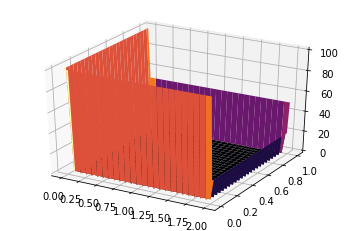

In [9]:
# print(V.shape, x.shape)
# xs=x**2
# print(xs.shape)
# print (nn_params)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

xmat,ymat = np.meshgrid (x,y)
fig = plt.figure()
ax = fig.add_subplot ( 111, projection = '3d' )
ax.plot_surface ( xmat, ymat,T , cmap = 'inferno') 
plt.draw ( )
plt.show ( block = False ) # Plotting the NN output
#plt.plot(x, np.sqrt(2/l) * np.sin(n*np.pi * (x-x0)/l), 'r--', label='analytical')  # Plotting the actual wavefuncion

In [49]:
def objective(params, step):
  pcrc1 = 15
  nnparams = params["nn"]
  nnparamsy = paramsy["nn"]
  E = params["E"]
  h=[]
  ddh=[]
  w=[]
  ddw=[]
  for i in range(divs):
    wfx = psix(nnparams,x)
    wfy = psiy(nnparamsy,y)
    h.append( wfx.reshape(divs))
    ddh.append(ddpsix(nnparams, x))
    w.append( wfy.reshape(divs))
    ddw.append(1/(y+ep)*ddpsiy(nnparamsy,y))
  #loss = mean + np.sum((psix0 - h[0])**2) + np.sum((psix1 - h[-1])**2)+ np.sum((psiy0 - w[0])**2) + np.sum((psiy1 - w[-1])**2)
  #T=np.zeros([divs,divs])
  #K=np.ones([divs,divs])
  T=100-np.array(h)*(np.array(w).T)*80#*bound(K) +boundryinit(T)   
  diffeq = np.array(h)*np.array(ddw).T+ np.array(ddh)*np.array(w).T- 0.01*np.ones([divs,divs])
  mean = (np.mean(diffeq**2))   
  loss = 100*mean + boundry(T)
  if(step%10==0):
    print ("Iteration " + str(step) + "\ndiffeq = " + str(mean) )
    print ("loss = " + str(loss))# + "\nE = " + str(params['E']))
    print ("--------------------------------------------------------------")
  return loss
objective(params,3)

215789.24160176842

653781.3261029114

In [11]:
def bound(Tinit):
    
    #  Left boundary.
    j = 0
    for i in range ( 0,divs ):
        Tinit[i][j]=0
    # Right boundary.

    j = divs - 1
    for i in range ( 0, divs ):
        Tinit[i][j] = 0
    #to be calculated using free convection formulas with the use og grrashoff Prantl number

      #  Upper boundary.
    i = divs - 1
    for j in range ( 0, divs ):
        Tinit[i][j] = 0
    #to be calculated using free convection formulas with the use og grrashoff Prantl number
      #  Lower boundary. 
    i = 0
    for j in range ( 0, divs ):
        Tinit[i][j] = 0
    return Tinit

Running Model

In [57]:
#optims = importlib.reload(optims)
params = optims.adam (grad(objective), params, step_size = 0.001, num_iters = 1000)

Iteration 0
diffeq = Autograd ArrayBox with value 4.315100661236554
loss = Autograd ArrayBox with value 253559.4506938533
--------------------------------------------------------------
Iteration 10
diffeq = Autograd ArrayBox with value 5.1789180655578075
loss = Autograd ArrayBox with value 249957.17410052803
--------------------------------------------------------------
Iteration 20
diffeq = Autograd ArrayBox with value 4.400097231321959
loss = Autograd ArrayBox with value 247724.8504417366
--------------------------------------------------------------
Iteration 30
diffeq = Autograd ArrayBox with value 4.495079847434134
loss = Autograd ArrayBox with value 246962.61329966693
--------------------------------------------------------------
Iteration 40
diffeq = Autograd ArrayBox with value 4.698137623205618
loss = Autograd ArrayBox with value 246782.47584844503
--------------------------------------------------------------
Iteration 50
diffeq = Autograd ArrayBox with value 4.84192347970404

Results For 1D Box with V=0

# Result for ANN

Loading BokehJS ...

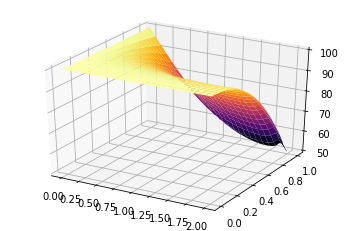

Loading BokehJS ...

In [59]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from bokeh.models import ColorBar, LogColorMapper, LogTicker
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
import bokeh.io
bokeh.io.reset_output()
bokeh.io.output_notebook()
 
nnparams = params["nn"]
nnparamsy = paramsy["nn"]
E = params["E"]
h=[]
ddh=[]
w=[]
ddw=[]
for i in range(divs):
  wfx = psix(nnparams,x)
  wfy = psiy(nnparamsy,y)
  h.append( wfx.reshape(divs))
  ddh.append(ddpsix(nnparams, x))
  w.append( wfy.reshape(divs))
  ddw.append(1/(y+ep)*ddpsiy(nnparamsy,y))
  
  #loss = mean + np.sum((psix0 - h[0])**2) + np.sum((psix1 - h[-1])**2)+ np.sum((psiy0 - w[0])**2) + np.sum((psiy1 - w[-1])**2)
  #T=np.zeros([divs,divs])
  #K=np.ones([divs,divs]) 
  #loss = mean + np.sum((psix0 - h[0])**2) + np.sum((psix1 - h[-1])**2)+ np.sum((psiy0 - w[0])**2) + np.sum((psiy1 - w[-1])**2)
T=np.zeros([divs,divs])
K=np.ones([divs,divs])
T= 100-np.array(h)*(np.array(w).T)*80 #boundryinit(T)   
#X = psix(params['nn'], x)
#Y = psiy(params['nn'], y)
xmat,ymat = np.meshgrid ( x,y)
#Txmat,Tymat = np.meshgrid ( X, Y )
#T = (Txmat*Tymat)
fig = plt.figure()
ax = fig.add_subplot ( 111, projection = '3d' )
ax.plot_surface ( xmat, ymat,T , cmap = 'inferno')
plt.draw ( )
plt.show ( block = False ) # Plotting the NN output


image = T 
color_mapper = LogColorMapper(palette="Inferno256", low=20, high=100)
plot = figure(x_range=(x0,x1), y_range=(y0,y1) , title="cs heat map")
plot.image(image=[image], color_mapper=color_mapper,
           dh=[1.0], dw=[2.0], x=[0], y=[0])
color_bar = ColorBar(color_mapper=color_mapper,
                     label_standoff=12, border_line_color=None, location=(0,0))
#color_mapper=mapper['transform'], width=8,  location=(0,0))
plot.add_layout(color_bar, 'right')
output_notebook()
show(plot)

# FEM Result

In [76]:
def boundary2 ( nx, ny, xx, yy, A, rhs ):
#  Left boundary.
  j = 0
  for i in range ( 0, ny ):
    kc = i * nx + j
    xc = xx[j]
    yc = yy[i]
    A[kc,kc] = 1.0
    rhs[kc] = 100.0

# Right boundary.
  j = nx - 1
  for i in range ( 0, ny ):
    kc = i * nx + j
    xc = xx[j]
    yc = yy[i]
    A[kc,kc] = 1.0
    rhs[kc] = 20
#to be calculated using free convection formulas with the use og grrashoff Prantl number
    
  #  Upper boundary.
  i = ny - 1
  for j in range ( 0, nx ):
    kc = i * nx + j
    xc = xx[j]
    yc = yy[i]
    A[kc,kc] = 1.0
    rhs[kc] = 40
#to be calculated using free convection formulas with the use og grrashoff Prantl number
    

  #  Lower boundary.
 
  i = 0
  for j in range ( 0, nx ):
    kc = i * nx + j
    xc = xx[j]
    yc = yy[i]
    A[kc,kc] = 1.0
    rhs[kc] =  100


  return A, rhs

def fd2d_heat_steady ( nx, ny, xx, yy, d, f ):
  import numpy as np
#  Set the total number of unknowns.
  n = nx * ny
#  Allocate the matrix and right hand side.
  A = np.zeros ( [ n, n ] )
  rhs = np.zeros ( n )

#  Define the matrix at interior points.
  A, rhs = interior ( nx, ny, xx, yy, d, f, A, rhs )
#  Handle boundary conditions.
  A, rhs = boundary2 ( nx, ny, xx, yy, A, rhs )
  u = np.linalg.solve ( A, rhs )
  u.shape = ( ny, nx )  
  return u


def fd2d_heat_steady_test (nx,ny):
#
  import numpy as np
  from mpl_toolkits.mplot3d import Axes3D
  import matplotlib.pyplot as plt
  from matplotlib import cm
  from bokeh.models import ColorBar, LogColorMapper, LogTicker
  from bokeh.plotting import figure, output_file, show
  from bokeh.io import output_notebook
  import bokeh.io
# this is here only for completeness to clarify where
# the methods are nested (you probably already imported this earlier)


  bokeh.io.reset_output()
  bokeh.io.output_notebook()
#  Specify the spatial grid.
  xvec = np.linspace ( 0.0, 2.0, nx )
  yvec = np.linspace ( 0.0, 1.0, ny )
#
#  Solve the finite difference approximation to the steady 2D heat equation.
  umat = fd2d_heat_steady ( nx, ny, xvec, yvec, d, f )

#  Plotting.
  xmat, ymat = np.meshgrid ( xvec, yvec )

  fig = plt.figure()
  ax = fig.add_subplot ( 111, projection = '3d' )
  #ax.plot_surface ( xmat, ymat, umat, cmap = 'cm.coolwarm',
  ax.plot_surface ( xmat, ymat, umat, cmap = 'inferno',
    linewidth = 0, antialiased = False )
  ax.set_xlabel ( '<--- z --->' )
  ax.set_ylabel ( '<--- r --->' )
  ax.set_zlabel ( '<---T(r,z)--->' )
  ax.set_title ( 'Solution of steady heat equation' )
  plt.draw ( )
  plt.show ( block = False )
  '''
  filename = 'fd2d_heat_steady_test01.png'
  fig.savefig ( filename )

  print ( '' )
  print ( '  Plotfile saved as "%s".' % ( filename ) )
  '''
    
  #bokeh plot  
  #output_file('color_bar.html')
  image = umat 
  color_mapper = LogColorMapper(palette="Inferno256", low=20, high=100)
  plot = figure(x_range=(0,2), y_range=(0,1) , title="cs heat map")
  plot.image(image=[image], color_mapper=color_mapper,
           dh=[1.0], dw=[2.0], x=[0], y=[0])
  color_bar = ColorBar(color_mapper=color_mapper,
                     label_standoff=12, border_line_color=None, location=(0,0))
  #color_mapper=mapper['transform'], width=8,  location=(0,0))
  plot.add_layout(color_bar, 'right')
  output_notebook()
  show(plot)
  return umat

def d ( xx, yy ):
#*****************************************************************************80
## D evaluates the heat conductivity coefficient.
#  Parameters:
#    Input, real X, Y, the evaluation point.
#    Output, real VALUE, the value of the heat conductivity at (X,Y).
  value = 1.0
  return value

def f ( xx, yy ):
#--------------------------------------------------------------------------------------------------
## F evaluates the heat source term.
#  Parameters:
#    Input, real X, Y, the evaluation point.
#    Output, real VALUE, the value of the heat source term at (X,Y).
  value=0.0
  if(yy<0.2 ): 
        value = 100.0
  return value

def interior ( nx, ny, xx, yy, d, f, A, rhs ):
  import numpy as np

#  For now, assume X and Y are equally spaced.
  dx = xx[1] - xx[0]
  dy = yy[1] - yy[0]

  for ic in range ( 1, ny - 1 ):
    for jc in range ( 1, nx - 1 ):

      ino = ic + 1
      iso = ic - 1
      je = jc + 1
      jw = jc - 1

      kc = ic * nx + jc
      ke = kc + 1
      kw = kc - 1
      kn = kc + nx
      ks = kc - nx

      dce = d ( 0.5 * ( xx[jc] + xx[je] ),         yy[ic] )
      dcw = d ( 0.5 * ( xx[jc] + xx[jw] ),         yy[ic] )
      dcn = d (         xx[jc],           0.5 * ( yy[ic] + yy[ino] ) )
      dcs = d (         xx[jc],           0.5 * ( yy[ic] + yy[iso] ) )

      A[kc,kc] =  ( dce + dcw )*xx[jc]/ dx / dx/0.5*(xx[je]+xx[jw]) + ( dcn + dcs ) / dy / dy
      A[kc,ke] = -  dce*0.5 * (xx[jc] + xx[je])         / dx / dx/0.5 * ( xx[jc] + xx[je] )
      A[kc,kw] =       - dcw*0.5 * ( xx[jc] + xx[jw] )/ dx / dx/0.5 * ( xx[jc] + xx[jw] )
      A[kc,kn] =                           - dcn         / dy / dy
      A[kc,ks] =                                 - dcs   / dy / dy

      rhs[kc] = f ( xx[jc], yy[ic] )

  return A, rhs

Loading BokehJS ...

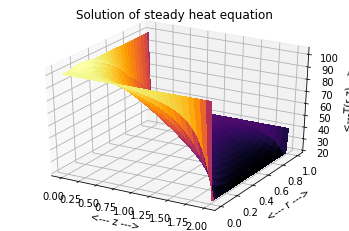

Loading BokehJS ...

In [77]:
if ( __name__ == '__main__' ):
  #timestamp ( )
  nx=divs
  ny=divs
  umax=fd2d_heat_steady_test (nx,ny )
  #timestamp ( )

In [162]:
print (params)
print (paramsy)

{'nn': [(array([[ 0.36768299, -1.20789702,  0.78322956, -1.15085773, -0.35747525,
         1.04764131,  6.20864881, -1.04030141,  0.82211457,  3.3144052 ,
        -0.74786638,  3.43590757,  1.19860948, -3.26873686,  0.32397686,
         0.63628147]]), array([ 0.31793002,  2.39421337,  0.34964363,  2.21118551,  0.70988025,
        0.08716559, -0.12788569,  2.03946986, -0.06934067,  0.37870314,
        1.48858022, -0.33255989,  0.90040673,  0.83758623, -0.28561571,
       -1.3827826 ])), (array([[ 1.06429369e+00, -3.40099762e-01, -4.60535482e-01,
        -8.40069148e-01, -9.00730467e-01,  5.85868953e-01,
         6.97633776e-01, -2.78422494e+00, -1.51963450e+00,
        -7.18129931e-01,  8.12216956e-01, -7.40406193e-01,
         2.15762022e+00, -5.93141950e-01, -3.18516676e-01,
         1.26950926e+00],
       [-1.34288378e+00, -1.61320796e+00, -4.80562733e-01,
         3.99837160e+00, -2.94127315e+00,  5.63492832e+00,
        -3.26981749e-01, -8.21085258e-01,  7.56961983e+00,
         1

# Difference

Loading BokehJS ...

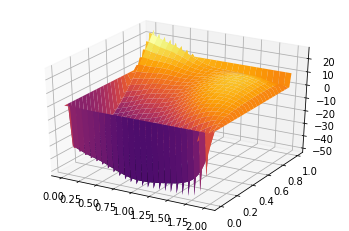

Loading BokehJS ...

In [88]:
#import numpy as np1
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from bokeh.models import ColorBar, LogColorMapper, LogTicker
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
import bokeh.io
# this is here only for completeness to clarify where
# the methods are nested (you probably already imported this earlier)
bokeh.io.reset_output()
bokeh.io.output_notebook()
#  Specify the spatial grid.
nx=divs
ny=divs
xvec = np.linspace ( 0.0, 2.0, nx )
yvec = np.linspace ( 0.0, 1.0, ny )
#
#  Solve the finite difference approximation to the steady 2D heat equation.
umat = fd2d_heat_steady ( nx, ny, xvec, yvec, d, f )
x = np.linspace(x0,x1,divs)[:, None]
y = np.linspace(y0,y1,divs)[:, None]
h=[]
ddh=[]
w=[]
ddw=[]    
for i in range(divs):
    wfx = psix(params["nn"],x)
    wfy = psiy(params['nn'],y)
    h.append( wfx.reshape(divs))
    ddh.append(ddpsix(params['nn'], x))
    w.append( wfy.reshape(divs))
    ddw.append(1/(y+ep)*ddpsiy(params['nn'],y))
   #loss = mean + np.sum((psix0 - h[0])**2) + np.sum((psix1 - h[-1])**2)+ np.sum((psiy0 - w[0])**2) + np.sum((psiy1 - w[-1])**2)
T=np.zeros([divs,divs])
K=np.ones([divs,divs])
T= np.multiply(np.array(h),np.array(w))*bound(K) +boundryinit(T) -umax

#  Plotting.
xmat, ymat = np.meshgrid ( xvec, yvec )

fig = plt.figure()
ax = fig.add_subplot ( 111, projection = '3d' )
ax.plot_surface ( xmat, ymat,T , cmap = 'inferno')
plt.draw ( )
plt.show ( block = False ) # Plotting the NN output


image = T 
color_mapper = LogColorMapper(palette="Inferno256", low=0, high=100)
plot = figure(x_range=(x0,x1), y_range=(y0,y1) , title="cs heat map")
plot.image(image=[image], color_mapper=color_mapper,
           dh=[1.0], dw=[2.0], x=[0], y=[0])
color_bar = ColorBar(color_mapper=color_mapper,
                     label_standoff=12, border_line_color=None, location=(0,0))
#color_mapper=mapper['transform'], width=8,  location=(0,0))
plot.add_layout(color_bar, 'right')
output_notebook()
show(plot)